## Seaport reclamation data – time series and trajectories
### Code generates four figures from Sengupta & Lazarus (2023) [doi xxxx]
#### Fig. 2c (trajectories of TEU vs reclaimed area compiled, 2011-2020)
#### Fig S1 (individual time series of reclamation for 68 seaports)
#### Fig S2 (individual trajectories of TEU vs reclaimed area over time, 2011-2020) 

In [16]:
# Import libraries

import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import math

# Import curve-fitting package from scipy
from scipy.optimize import curve_fit
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Plotting all seaports in the same frame

In [17]:
# Import the reclamation & trade volume over time dataset...
url = 'https://zenodo.org/record/7674076/files/Sengupta_Lazarus_rec_TEU_2011_2020.csv?download=1'
TRAJECTS = pd.read_csv(url)

# TRAJECTS = pd.read_csv("Sengupta_Lazarus_rec_TEU_2011_2020.csv")

TRAJECTS.head(3) # check to confirm

,Year,Seaports,Reclamation Km2 (raw),Reclamation Km2 (smoothed),Volume Million TEU
0,2011,Tianjin,96.39,96.39,11.5
1,2011,Singapore,39.09,39.93,29.9
2,2011,Shanghai,45.50,45.50,31.7


In [3]:
TRAJECTS.sort_values(by=['Seaports', 'Year'], inplace=True)

In [4]:
TRAJECTS.rename({'Seaports':'Seaport',
                 'Reclamation  Km2 (raw)':'Reclamation (raw, km2)',
                 'Reclamation  Km2 (smoothed)':'Reclamation (smoothed, km2)',
                'Volume Million TEU ': 'TEU (millions)'},
                axis=1, inplace=True)

TRAJECTS.head(20) # check dataframe to confirm 

,Year,Seaport,"Reclamation (raw, km2)","Reclamation (smoothed, km2)",TEU (millions)
27,2011,Algeciras,2.48,2.48,3.60
72,2012,Algeciras,2.66,2.63,4.11
117,2013,Algeciras,2.91,2.66,4.50
162,2014,Algeciras,2.69,2.69,4.55
207,2015,Algeciras,2.63,2.69,4.51
252,2016,Algeciras,2.75,2.74,4.76
297,2017,Algeciras,2.74,2.74,4.38
342,2018,Algeciras,2.69,2.75,4.77
387,2019,Algeciras,2.77,2.77,5.12
432,2020,Algeciras,3.06,3.06,5.11


Text(10, -10, 'c')

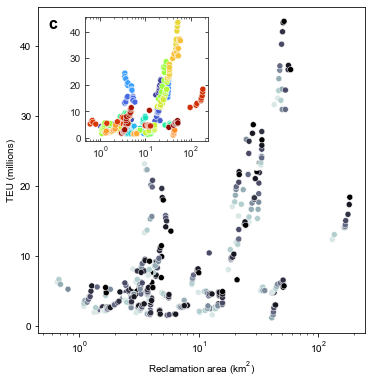

In [5]:
# All seaports in the same frame: TEU vs reclamation area through time
# inset differentiates individual seaports by color

f, ax = plt.subplots(figsize = (6, 6))

custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)


sns.scatterplot(data = TRAJECTS,
            x = 'Reclamation (smoothed, km2)',
            y = 'TEU (millions)',
            hue = 'Year',
            palette = 'bone_r',
            legend = False,
            ax = ax)

sns.despine(right=False, top=False)
ax.set_box_aspect(1)
ax.set_xscale('log')
plt.xlabel('Reclamation area ($\mathregular{km^2}$)')


axins = inset_axes(ax, '38%', '38%', loc = 'upper left', borderpad = 2, bbox_to_anchor=(0.08,0.03,1,1), bbox_transform=ax.transAxes)

sns.scatterplot(data = TRAJECTS,
            x = 'Reclamation (smoothed, km2)',
            y = 'TEU (millions)',
            hue = 'Seaport',
            palette = 'turbo',
            legend = False,
            ax = axins)

plt.xlabel('')
plt.ylabel('')

sns.despine(right=False, top=False)
axins.set_box_aspect(1)
axins.set_xscale('log')
# axins.set_yscale('log')

ax.annotate('c', xy=(0,1), xycoords="axes fraction",
                 xytext=(10,-10), textcoords="offset points",
                 ha="left", va="top",
                 size = 16, color = 'black', weight = 'semibold')


# plt.savefig('PORTS_F2c.png', dpi = 300)


## Individual representations of these trajectories

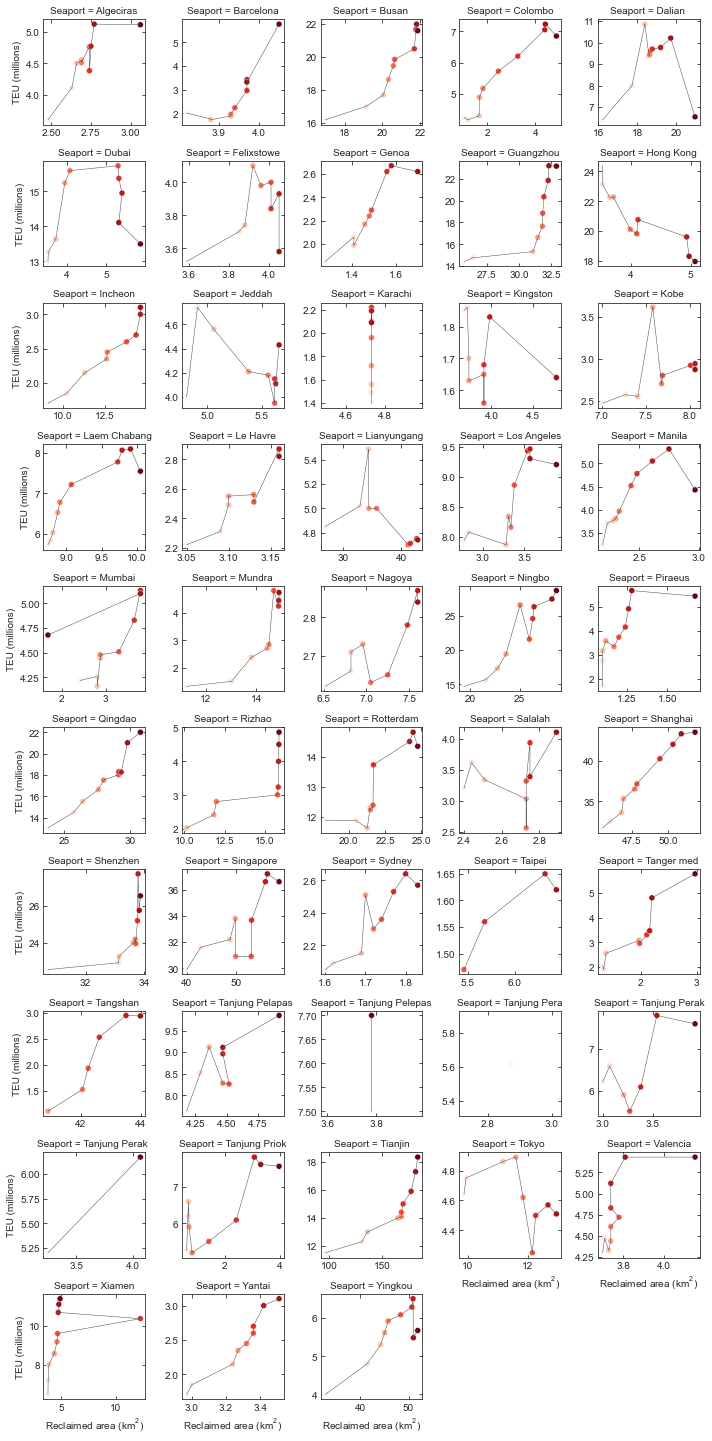

In [6]:
# Facetgrid arrangement:

df = TRAJECTS

custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df,
                     col = "Seaport",
#                      hue = "Year",
#                      palette = "rocket_r",
                     col_wrap = 5,
                     height = 2,
                     sharey = False,
                     sharex = False,
                    despine = False)



# Show the trajectory for each city
grid.map(plt.plot, "Reclamation (smoothed, km2)", "TEU (millions)", linewidth = 0.5, color = '0.3')
# grid.map(plt.plot, "Reclamation (raw, km2)", "TEU (millions)", linewidth = 0.5, color = 'k')
grid.map_dataframe(sns.scatterplot, "Reclamation (smoothed, km2)", "TEU (millions)", hue = 'Year', palette = 'Reds')

grid.set_axis_labels('Reclaimed area ($\mathregular{km^2}$)')

# plt.savefig('PORTS_FigS2.png', dpi = 300)

## Reclamations time series

In [18]:
# Import the reclamation vs trade volume over time dataset...
url = 'https://zenodo.org/record/7674076/files/Sengupta_Lazarus_time_series_rec_data.csv?download=1'
RECTIME = pd.read_csv(url)

# RECTIME = pd.read_csv("Sengupta_Lazarus_time_series_rec_data.csv")

RECTIME.head(3) # check to confirm

,Year,Seaport,Country,Region,Reclaimed area raw (km2),Reclaimed area smoothed (km2)
0,1990,Abu Dhabi,UAE,Middle East,11.76,11.76
1,1990,Alexandria,Eygpt,Middle East,0.44,0.44
2,1990,Algeciras,Greece,Mediterranean,0.62,0.62


In [8]:
RECTIME.sort_values(by=['Seaport', 'Year'], inplace=True)

RECTIME.head(50) # check bottom of dataframe to confirm 

,Year,Seaport,Country,Region,Reclaimed area raw (km2),Reclaimed area smoothed (km2)
0,1990,Abu Dhabi,UAE,Middle East,11.76,11.76
68,1991,Abu Dhabi,UAE,Middle East,14.24,14.24
136,1992,Abu Dhabi,UAE,Middle East,14.53,14.53
204,1993,Abu Dhabi,UAE,Middle East,14.61,14.61
272,1994,Abu Dhabi,UAE,Middle East,14.62,14.62
340,1995,Abu Dhabi,UAE,Middle East,14.63,14.63
408,1996,Abu Dhabi,UAE,Middle East,14.64,14.64
476,1997,Abu Dhabi,UAE,Middle East,14.73,14.73
544,1998,Abu Dhabi,UAE,Middle East,17.29,17.29
612,1999,Abu Dhabi,UAE,Middle East,18.63,18.47


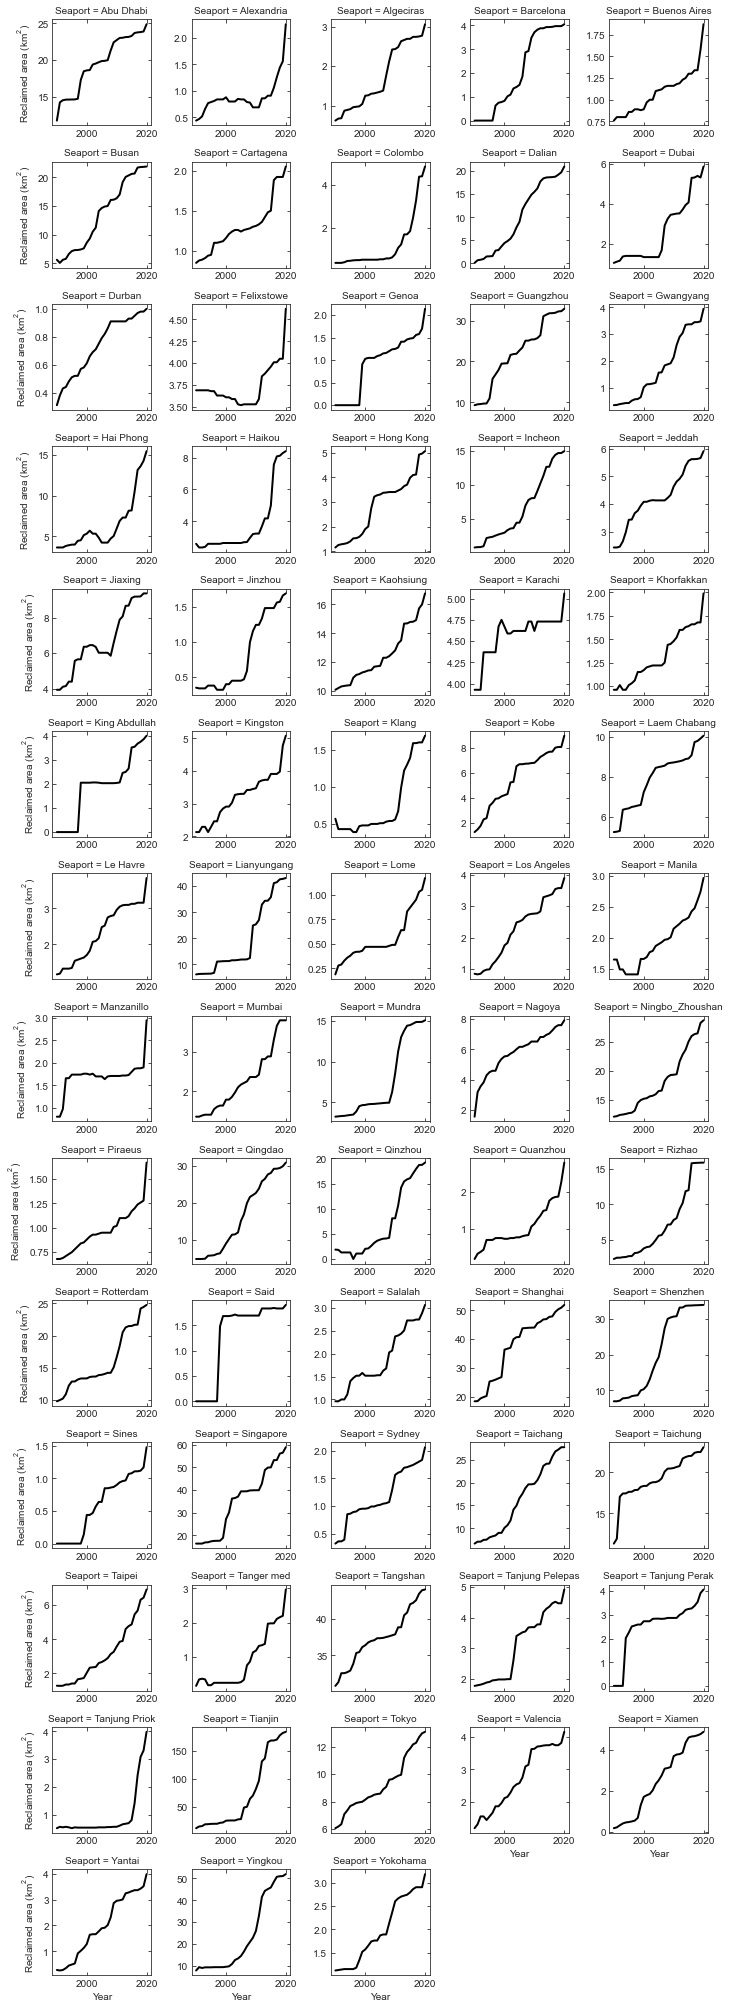

In [15]:
# Facetgrid arrangement:

df = RECTIME

custom = {'font': 'Arial',
               'xtick.direction': 'in',
               'ytick.direction': 'in',
               'xtick.top': 'True',
               'ytick.right': 'True'}

sns.set_style('ticks', rc = custom)

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df,
                     col = "Seaport",
                     col_wrap = 5,
                     height = 2,
                     sharey = False,
                     sharex = False,
                    despine = False)

# Show the trajectory for each city
grid.map(plt.plot, "Year", "Reclaimed area smoothed (km2)", color = 'k', linewidth = 2)
grid.set_ylabels('Reclaimed area ($\mathregular{km^2}$)')

plt.savefig('PORTS_FigS1.png', dpi = 300)